In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
dataset=pd.read_csv('/content/houseprice.csv')

In [4]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
X=dataset


In [6]:
X.drop('price',axis=1)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
Y=X['price']

In [8]:
print(Y)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


In [9]:
X.drop(columns=['date'], inplace=True)

In [10]:
Y=dataset['price']

In [11]:
X_data=np.array(X)

In [12]:
print(X_data)

[[ 7.12930052e+09  2.21900000e+05  3.00000000e+00 ... -1.22257000e+02
   1.34000000e+03  5.65000000e+03]
 [ 6.41410019e+09  5.38000000e+05  3.00000000e+00 ... -1.22319000e+02
   1.69000000e+03  7.63900000e+03]
 [ 5.63150040e+09  1.80000000e+05  2.00000000e+00 ... -1.22233000e+02
   2.72000000e+03  8.06200000e+03]
 ...
 [ 1.52330014e+09  4.02101000e+05  2.00000000e+00 ... -1.22299000e+02
   1.02000000e+03  2.00700000e+03]
 [ 2.91310100e+08  4.00000000e+05  3.00000000e+00 ... -1.22069000e+02
   1.41000000e+03  1.28700000e+03]
 [ 1.52330016e+09  3.25000000e+05  2.00000000e+00 ... -1.22299000e+02
   1.02000000e+03  1.35700000e+03]]


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y,train_size=0.8,random_state=42)

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train_scaler=scaler.fit_transform(X_train)

In [ ]:

X_test_scaler=scaler.transform(X_test)

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaler.shape[1],)),

    Dense(64, activation='relu'),

    Dense(32,activation='relu'),
    Dense(1)
])

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
X_train_scaler.shape

(17290, 20)

In [ ]:
Y_train.shape

(17290,)

In [ ]:
model.fit(X_train_scaler,Y_train,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
541/541 [==============================] - 1s 1ms/step - loss: 367184969728.0000
Epoch 2/50
541/541 [==============================] - 1s 1ms/step - loss: 81553186816.0000
Epoch 3/50
541/541 [==============================] - 1s 1ms/step - loss: 44587270144.0000
Epoch 4/50
541/541 [==============================] - 1s 1ms/step - loss: 31386484736.0000
Epoch 5/50
541/541 [==============================] - 1s 1ms/step - loss: 20383397888.0000
Epoch 6/50
541/541 [==============================] - 1s 1ms/step - loss: 12187831296.0000
Epoch 7/50
541/541 [==============================] - 1s 1ms/step - loss: 7010560512.0000
Epoch 8/50
541/541 [==============================] - 1s 1ms/step - loss: 3967362816.0000
Epoch 9/50
541/541 [==============================] - 1s 1ms/step - loss: 2335326976.0000
Epoch 10/50
541/541 [==============================] - 1s 1ms/step - loss: 1458230784.0000
Epoch 11/50
541/541 [==============================] - 1s 1ms/step - loss: 955200640.0000
Ep

In [ ]:
mse=model.evaluate(X_test_scaler,Y_test,verbose=0)

In [ ]:
print(mse)

235456.0


In [ ]:
prediction=model.predict(X_test_scaler)

136/136 [==============================] - 0s 848us/step


In [ ]:
print(prediction)

[[ 365023.9 ]
 [ 865188.9 ]
 [1039930.8 ]
 ...
 [ 284892.6 ]
 [ 604927.3 ]
 [ 356416.72]]


In [ ]:
import matplotlib.pyplot as plt

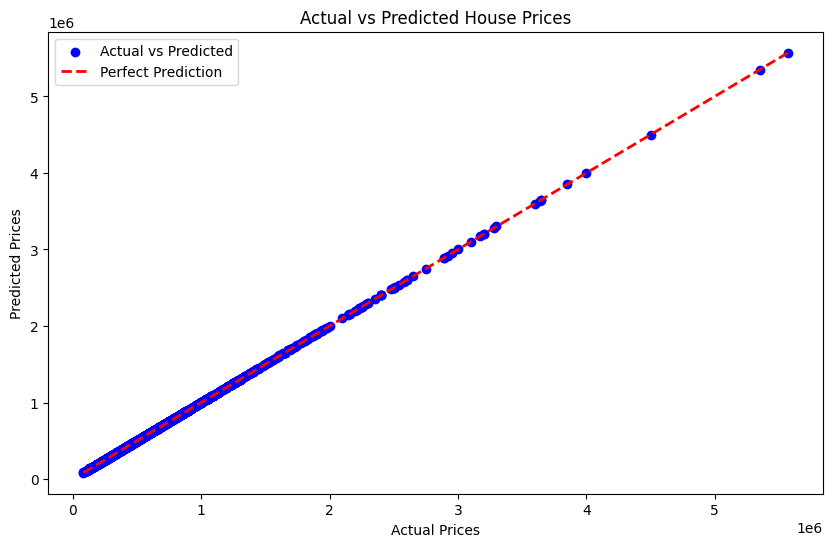

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, prediction, color='blue', label='Actual vs Predicted')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()